In [1]:
Lx = 100
nx = 25
dx = Lx/nx

x = LinRange(0, Lx, nx+1)

#Needed to apply periodic boundary conditions
x = x[1:nx];

In [2]:
function partial_x2_cd(f1, dx)
    d2f = zeros(size(f1))
    for i in 2:nx-1
        d2f[i] = 1/(dx^2) * (f1[i+1] - 2*f1[i] + f1[i-1])
    end
    d2f[1] = 1/(dx^2) * (f1[2] - 2*f1[1] + f1[nx])
    d2f[nx] = 1/(dx^2) * (f1[1] - 2*f1[nx] + f1[nx-1])
    return d2f
end

function diff_x(kappa, tracer, dx)
    
    f3 = zeros(size(tracer))
    f3 = kappa * partial_x2_cd(tracer, dx)
end

diff_x (generic function with 1 method)

In [5]:
lmda = (2*pi)/Lx
phi_old = sin.(lmda*x)
phi_old = phi_old[1:nx]
phi_new = zeros(nx)
phi_true = zeros(nx)

t_start = 0
t_end = 40
dt = 1

kappa = 4.0;

for t in t_start:dt:t_end
    phi_new = phi_old + dt*diff_x(kappa, phi_old, dx)
    @. phi_true = exp(-lmda^2 * (t-dt) * kappa) * sin(lmda*x)
    phi_old = phi_new
end

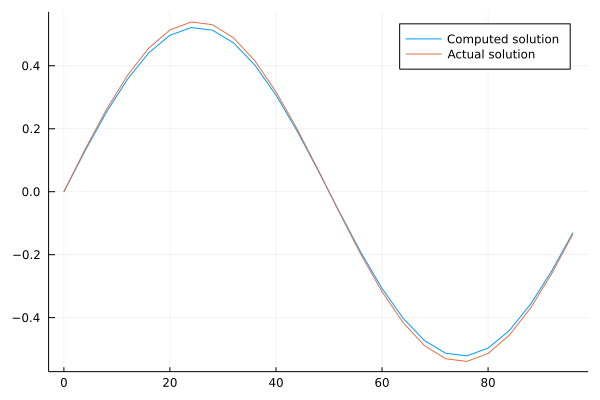

In [6]:
using Plots
plot(x, phi_old, label = "Computed solution")
plot!(x, phi_true, label = "Actual solution")